# 2D Histograms in physt

In [1]:
# Necessary import evil
%matplotlib inline
import physt
from physt import histogram2d, histogramdd, histogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/pipek/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
x = np.random.normal(100, 1, 1000)
y = np.random.normal(10, 10, 1000)

In [3]:
h2 = histogram2d(x, y, [8, 4], name="Some histogram", axis_names=["x", "y"])
h2

Histogram2D(bins=(8, 4), total=1000.0)

In [4]:
h2.frequencies

array([[   1.,    5.,    4.,    0.],
       [   2.,   23.,   56.,    9.],
       [  10.,   95.,  136.,   25.],
       [  14.,  116.,  191.,   39.],
       [   3.,   73.,  120.,   19.],
       [   3.,   23.,   19.,    5.],
       [   0.,    2.,    3.,    3.],
       [   0.,    0.,    1.,    0.]])

## Plotting

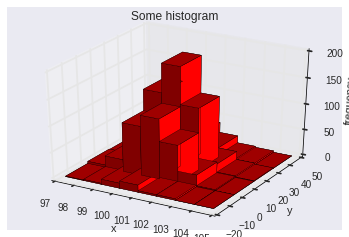

In [5]:
%matplotlib inline
ax = h2.plot(color="r")

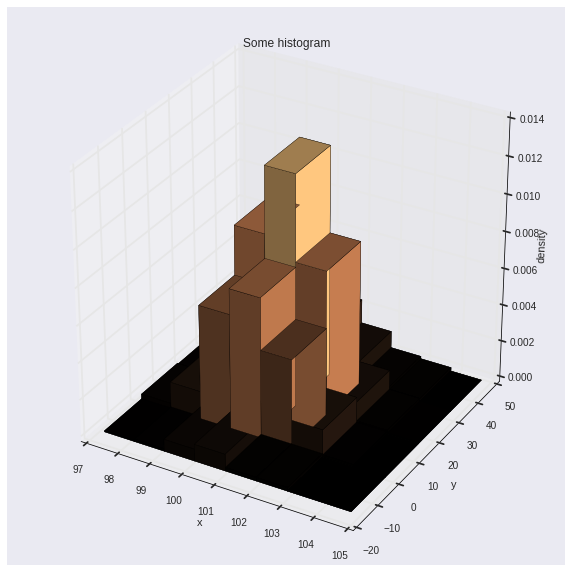

In [6]:
%matplotlib inline
import matplotlib.cm as cm

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax = h2.plot(ax=ax, cmap=cm.copper, density=True)

## Projections

/home/pipek/code/physt/physt/histogram1d.py:291: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


Histogram1D(bins=8, total=1000.0)

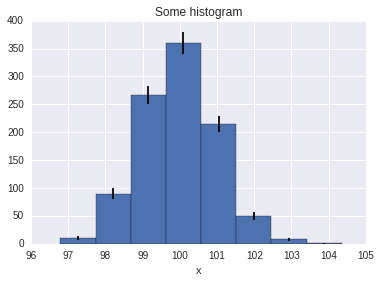

In [7]:
h1 = h2.projection("x")
h1.plot(errors=True)
h1

/home/pipek/code/physt/physt/histogram1d.py:291: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


Histogram1D(bins=4, total=1000.0)

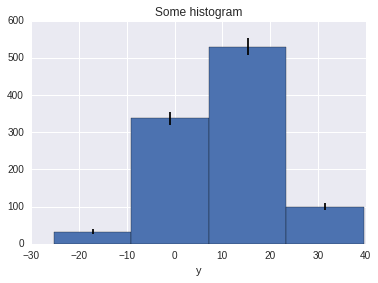

In [8]:
h1 = h2.projection("y")
h1.plot(errors=True)
h1

## N-dimensional histograms

In [9]:
data = [np.random.rand(1000)[:, np.newaxis] for i in range(4)]
data = np.concatenate(data, axis=1)
h5 = histogramdd(data, [3, 2, 2, 3], axis_names="abcd")
h5

HistogramND(bins=(3, 2, 2, 3), total=1000.0)

In [10]:
h5.frequencies

array([[[[ 28.,  25.,  36.],
         [ 36.,  26.,  31.]],

        [[ 24.,  25.,  29.],
         [ 30.,  28.,  32.]]],


       [[[ 26.,  27.,  26.],
         [ 33.,  30.,  18.]],

        [[ 22.,  23.,  30.],
         [ 27.,  33.,  24.]]],


       [[[ 40.,  30.,  24.],
         [ 34.,  22.,  23.]],

        [[ 35.,  20.,  25.],
         [ 33.,  21.,  24.]]]])

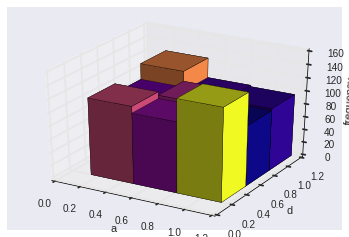

In [11]:
h5.projection("a", "d").plot();

/home/pipek/code/physt/physt/histogram1d.py:291: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


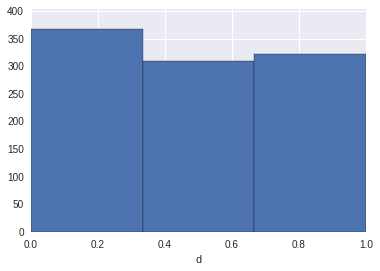

In [12]:
h5.projection("d").plot();

## Support for pandas DataFrames (without pandas dependency ;-))

In [13]:
# Load notorious example data set
import seaborn as sns
iris = sns.load_dataset('iris')

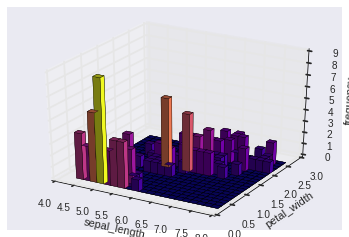

In [14]:
iris_hist = histogramdd(iris[["sepal_length", "petal_width"]], 20)
iris_hist.plot();

/home/pipek/code/physt/physt/histogram1d.py:291: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


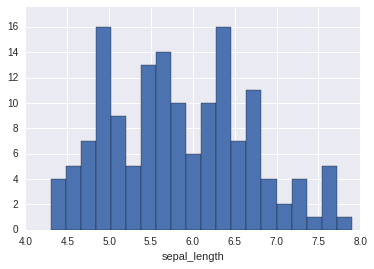

In [15]:
iris_hist.projection("sepal_length").plot();

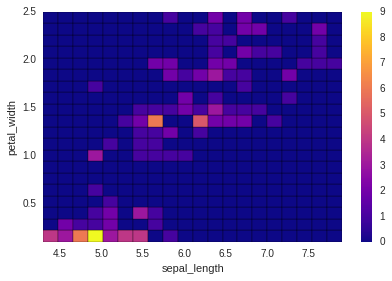

In [16]:
iris_hist.plot("map");